# Radar observation : reflectivity composite of the new product

The aim of this notebook is to indicate how to read the reflectivity data of the new product. These data range from 01/02/2018 to 31/12/18 included.

For each pixel is indicated 3 data types:
<ul>
    <li>'data' : reflectivity values (in 1/10 dBZ) </li>
    <li>'prob' : rain probability (in %) </li>
    <li>'height' : selected measure height (in m) </li>
</ul>

The non detected value is -10 and the missing value is -20.

In this notebook, a formula is provided to convert the dBz into mm.h<sup>-1</sup>.

/!\ there are discontinuities between the old and the new reflectivity product. Here are the developments of the new version :
<ul>
    <li>new algorithm of data processing </li>
    <li>the minimum detection threshold is reducing from 8 to -9 dBZ </li>
    <li>the reflectivity values have a step of 0.5 dBZ </li>
    <li>addition of 2 products : the rain probability and the selected measure height</li>
</ul>

# Quickstart

In [5]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 

In [6]:
####Cell containing the modifiable fields######
zone = "NW"
year = 2018
month = 12
decade = 2
fname = "../data_sample/radar/reflectivity_new_%s_%s_%s.%s.npz" % (zone, str(year),"{:02d}".format(month),str(decade))
fname_coords = "../data_sample/radar/radar_coords_%s.npz" % (zone)
ind = 1 #index of the chosen 5 min of the decade for the plot with basemap (cf last cell of the notebook)

#multiplication coefficient for the graphic representation of rainfall rate (in 1/coeff mm/h)
#/!\### the colorbar is adapted to the coefficient 10 (cf plot at the end)
coeff = 10         

In [7]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [10]:
def plot_data(fname, fname_coords, title = "examples of data plots"):
    ####data loading
    d = np.load(fname, allow_pickle=True)
    data = d['data']     #reflectivity values 
    prob = d['prob']
    height = d['height']
    dates = d['dates']        #associated dates values
    miss_dates = d['miss_dates']        #missing dates values

    #get the coordinates of the points
    coords = np.load(fname_coords, allow_pickle=True)
    lat = coords['lats']
    lon = coords['lons']
    
    #plots
    fig, ax = plt.subplots(2, 2,figsize=(9,9))
    fig.suptitle(title, fontsize=16)
    
     #colorbar definition
    if (np.max(data) > 56):
        borne_max = np.max(data)
    else:
        borne_max = 56 + 10
    cmap = colors.ListedColormap(['lavender','indigo','mediumblue','dodgerblue', 'skyblue','cyan',
                              'olivedrab','lime','greenyellow','orange','red','magenta','pink','silver'])
    bounds = [0,4,8,12,16,20,24,32,40,48,56,borne_max,255]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    pl=ax[0,0].pcolormesh(lon, lat, data[ind,:,:],cmap=cmap, norm=norm)
    ax[0,0].set_ylabel('latitude (degrees_north)')
    ax[0,0].set_title("Reflectivity - "+ str(dates[ind]) + " - "+  zone + " zone")
#    img=m.imshow(data[ind,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
    fig.colorbar(pl,ax=ax[0,0], cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Reflectivity (in dBZ) / str(255) : missing values')
'''
    pl=ax[0,1].pcolormesh(lon, lat, prob[ind,:,:],cmap=cmap, norm=norm)
    ax[0,1].set_title(str(dates[1]) + " - "+  zone + " zone")

    pl=ax[1,0].pcolormesh(lon, lat, height[ind,:,:],cmap=cmap, norm=norm)
    ax[1,0].set_xlabel('longitude (degrees_east)')
    ax[1,0].set_ylabel('latitude (degrees_north)')
    ax[1,0].set_title(str(dates[2]) + " - "+  zone + " zone")
    '''
#    cbar = fig.colorbar(pl,ax=ax.ravel().tolist(),cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'vertical').set_label('Reflectivity (in dBZ) / '+ str(255) +' : missing values')
    return data,prob,height,dates, miss_dates, lat, lon

SyntaxError: invalid syntax (<ipython-input-10-0c813ff5d856>, line 45)

In [ ]:
data,prob,height,dates, miss_dates, lat, lon = plot_data(fname, fname_coords)

# More details

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).
The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 0.01° (the projection system is EPSG:4326).

Each file contains 2 time data categories : 
<ul>
    <li>'dates' : the associated dates to the rainfall values</li>
    <li>'miss_dates' : the dates for which the data are missing</li>
</ul>

The values are not continuous, there are defined in this way (each value is the inferior bound of each interval) :
<ul>
    <li>0 : Z < 8 dBZ </li>
    <li>8 : 8 < Z < 16 dBZ  </li>   
    <li>16 : 16 < Z < 20 dBZ </li>
    <li>...</li>
    <li>70 : 70 dBZ < Z </li>
</ul>

**To get the coordinates (lat,lon) of the points :**
One npz file contains 2 arrays : one for the latitudes and one for the longitudes.

Data dimensions: 
<ul>
<li>time dimension(=days number*24*12 -> time frequency of 5min)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>    

In [9]:
data.shape

(2880, 453, 689)

Dimensions of the 'dates' array:
<ul>
    <li>time dimension(=days number*24*12 -> time frequency of 5 min)</li>
</ul>

In [10]:
dates.shape

(2880,)

Overview of dates values :

In [11]:
dates

array([datetime.datetime(2018, 5, 1, 0, 5),
       datetime.datetime(2018, 5, 1, 0, 5),
       datetime.datetime(2018, 5, 1, 0, 10), ...,
       datetime.datetime(2018, 5, 10, 23, 45),
       datetime.datetime(2018, 5, 10, 23, 50),
       datetime.datetime(2018, 5, 10, 23, 55)], dtype=object)

Overview of data of type int16

In [12]:
data

array([[[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        [ 0,  0,  0, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0

Set of possible values over the chosen period at the beggining of the notebook 

In [13]:
values=np.unique(data)
values

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  13,
        15,  17,  20,  23,  27,  31,  36,  42,  48,  56,  64,  74,  86,
        99, 115, 133, 153, 177, 205, 236, 273, 315, 364, 421, 486, 561,
       648, 999], dtype=int16)

Plot example for a given time step and a given zone :

<IPython.core.display.Javascript object>


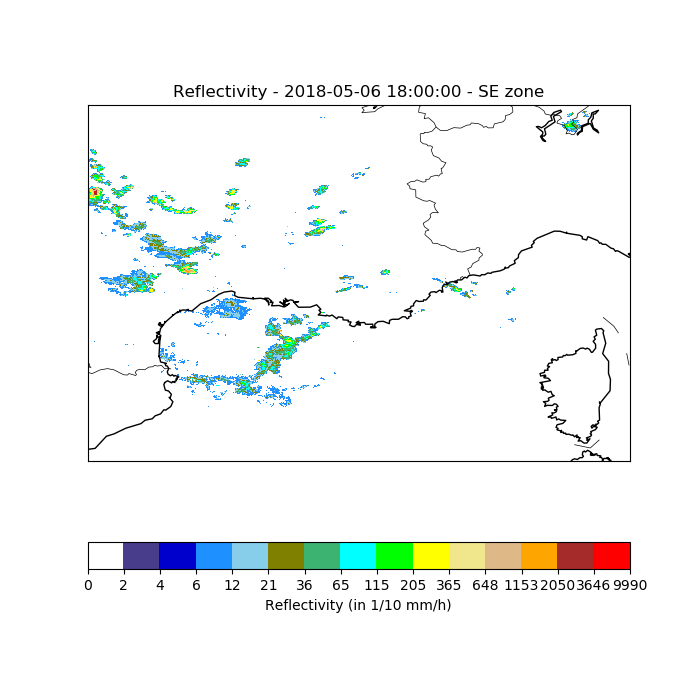

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [14]:
index = 1656   #index for the time dimension

fig,ax=plt.subplots(1,1,figsize=(7,7))
data_plot = coeff*data

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
#/!\### the scale is adapted to the coefficient 10
if (np.nanmax(data_plot) > 3646):
    borne_max = np.nanmax(data_plot)
else:
    borne_max = 3646 + 10
cmap = colors.ListedColormap(['white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                  ,'cyan','lime','yellow','khaki','burlywood','orange','brown','red'])
bounds = [0,2,4,6,12,21,36,65,115,205,365,648,1153,2050,3646,borne_max]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data_plot[index,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Reflectivity (in 1/10 mm/h)')
plt.title("Reflectivity - " + str(dates[index]) + " - " + zone+ " zone")
plt.show()

In [18]:
d.fid.close()